In [61]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
url="https://drive.google.com/uc?export=view&id=1mbMRMvMKQRXLbOQXMM8hMBOyoHNQfEj4"
img = io.imread(url)


In [67]:
img = cv2.cvtColor(img,cv.COLOR_BGR2RGB)

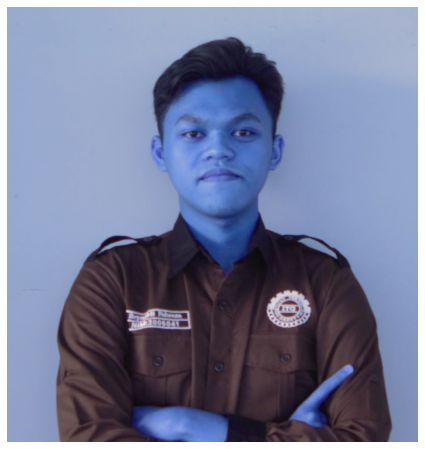

In [53]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [68]:
print(img.shape)

pixels = img.reshape(-1,3)

print(pixels.shape)

(1697, 1603, 3)
(2720291, 3)


Mengekstrak K warna yang paling dominan

In [69]:
from sklearn.cluster import KMeans

In [70]:
dominant_colors = 10
km = KMeans(n_clusters=dominant_colors)

In [71]:
km.fit(pixels)

KMeans(n_clusters=10)

In [72]:
print(km.cluster_centers_)

[[157.69930143 173.37792291 205.77646754]
 [ 50.41178851  36.81703247  49.88343155]
 [ 99.61337741 132.4642253  207.26943717]
 [129.62697108 146.19780368 185.90277953]
 [ 95.39694911  75.53528903  82.65054348]
 [ 42.80877398  64.99660262 127.74243343]
 [ 72.83876142  99.578576   165.51038355]
 [ 30.32179245  21.84617922  36.22645215]
 [ 72.61522996  53.5661329   62.30689759]
 [144.01357527 162.23522177 201.8613676 ]]


In [73]:
centers = np.array(km.cluster_centers_,dtype='uint8')

In [75]:
print(centers)

[[157 173 205]
 [ 50  36  49]
 [ 99 132 207]
 [129 146 185]
 [ 95  75  82]
 [ 42  64 127]
 [ 72  99 165]
 [ 30  21  36]
 [ 72  53  62]
 [144 162 201]]


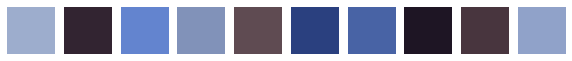

In [76]:
plt.figure(figsize=(10,4))
i=1
for color in centers:
    plt.subplot(1,dominant_colors,i)
    i+=1
    plt.axis('off')
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=color
    plt.imshow(a)
    
plt.show()

# **SEGMENTASI CITRA**

In [77]:
pixels.shape

(2720291, 3)

In [78]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [79]:
km.labels_.shape

(2720291,)

In [80]:
newimg = np.zeros(pixels.shape,dtype='uint8')
for i in range(pixels.shape[0]):
    newimg[i]=centers[km.labels_[i]]

In [81]:
newimg = newimg.reshape(img.shape)

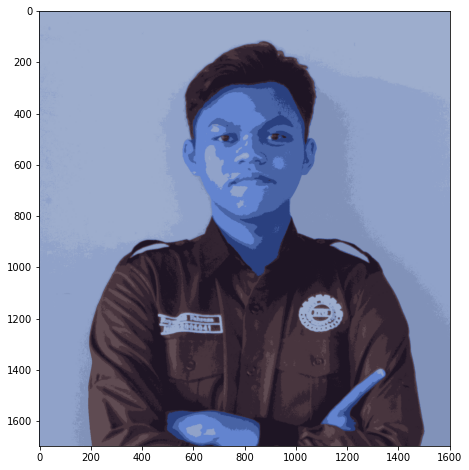

In [82]:
plt.figure(figsize=(10,8))
plt.imshow(newimg)